# Lead Scoring

### Imports

In [27]:
import pandas as pd
import numpy as np
import pycaret
from pycaret.classification import *
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Importing dataset

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website           NaN   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occu

### Looking at class balance

In [3]:
leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

The classes don't seem to be too imbalanced, so we will continue as is.

### Using PyCaret to develop Lead Scoring model

In [5]:
initial = setup(leads, target = 'Converted', ignore_features = ['Prospect ID', 'Lead Number'])

In [6]:
best_model = compare_models(sort='AUC')

It looks like Light Gradient Boosting Machine has the highest AUC and F1 Score, wo we will use this classifier

In [11]:
# Parameters
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=670, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


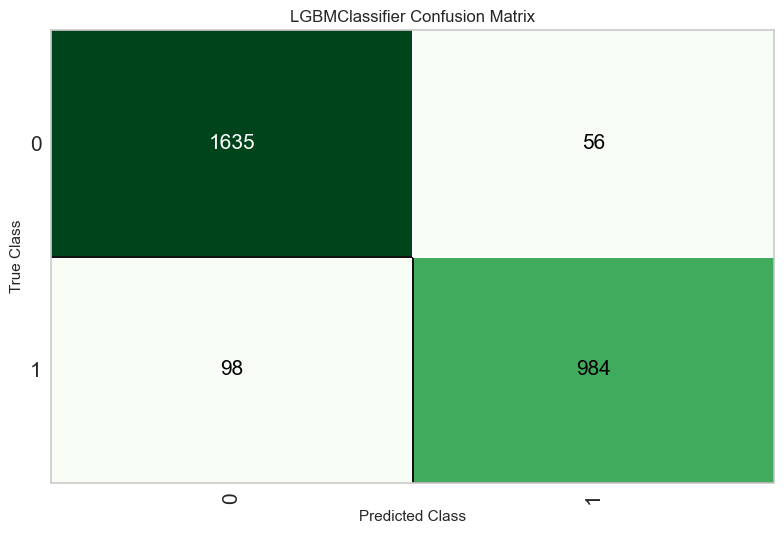

In [21]:
# Confusion matrix for test set
plot_model(best_model, plot = 'confusion_matrix')

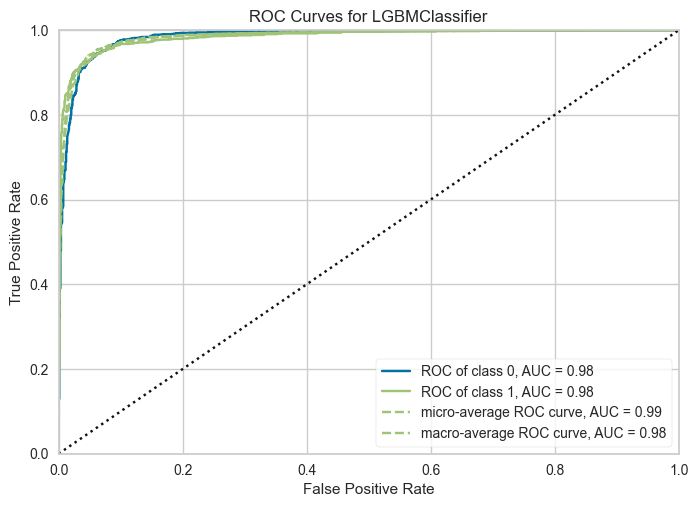

In [10]:
# AUC Plot
plot_model(best_model, plot = 'auc')

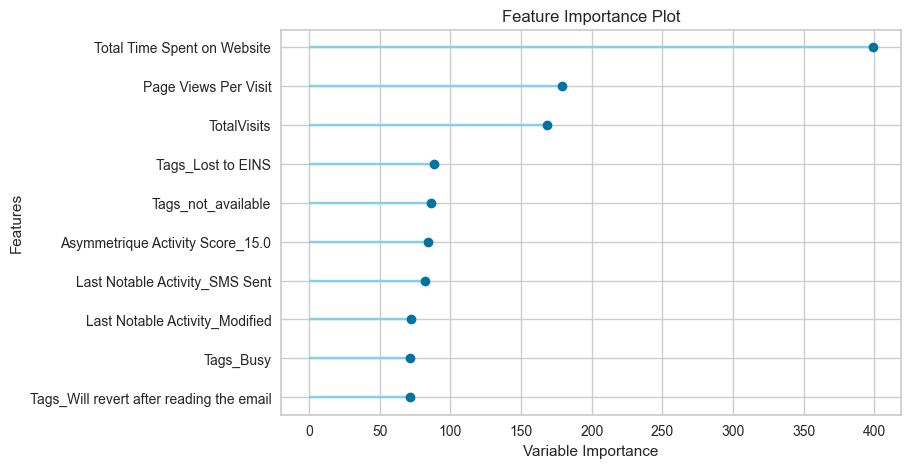

In [12]:
# Feature Importance
plot_model(best_model, plot = 'feature')

### Generating a Lead Score for each Lead

In [31]:
# create copy of data
leads_new = leads.copy()
leads_new.drop('Converted', axis=1, inplace=True)

# generate labels using predict_model
df = predict_model(best_model, data=leads_new, raw_score=True)
df['Actual Label'] = leads['Converted']
df.rename(columns = {'Score_1':'Probability of Converting'}, inplace = True)
predictions = df[['Prospect ID', 'Lead Number', 'Label', 'Actual Label', 'Probability of Converting']]
predictions.sort_values(by = 'Probability of Converting', ascending = False)

Prospect ID  Lead Number  Label  Actual Label  \
3090  be29cb52-4e92-4773-9ac6-2edfb42d4fb0       630287      1             1   
4005  00211c7a-7823-4fa8-8765-8f3d8e113f4e       621555      1             1   
8597  32d0a16f-50cd-464d-8312-b40213bc62a2       584160      1             1   
7941  4a602408-29a4-40ab-ad48-9036fd30e3ec       588899      1             1   
6725  770d256b-7d88-480e-9c1a-4b790412db06       598210      1             1   
...                                    ...          ...    ...           ...   
1921  65979174-21ab-4ff7-a306-2550fe7276f8       641062      0             0   
7797  35760c2a-62df-43c4-8b9f-b1be1b15e1f6       590061      0             0   
127   c311a2fd-e180-411d-8eb6-b80f6a8c7c05       659221      0             0   
1117  c7748892-cd82-4023-810f-f00ba97154ad       648066      0             0   
704   22d5ff8b-67b3-4f78-9830-b0ab3604122d       653231      0             0   

      Probability of Converting  
3090                     0.9996  
4005                     0.9996  
8597                     0.9995  
7941                     0.9995  
6725                     0.9995  
...                         ...  
1921                     0.0002  
7797                     0.0002  
127                      0.0002  
1117                     0.0002  
704                      0.0001  

[9240 rows x 5 columns]

We have ranked the leads by the probability that the lead will convert.

In [30]:
print(classification_report(predictions['Actual Label'], predictions['Label']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5679
           1       0.97      0.95      0.96      3561

    accuracy                           0.97      9240
   macro avg       0.97      0.97      0.97      9240
weighted avg       0.97      0.97      0.97      9240



For this model, I am looking for a higher precision, as we want to minimize the number of false
negatives (these are loans that would have converted but the model predicted that they didn't convert).
This precision score of .97 is very good.

### Analyzing Business Impacts

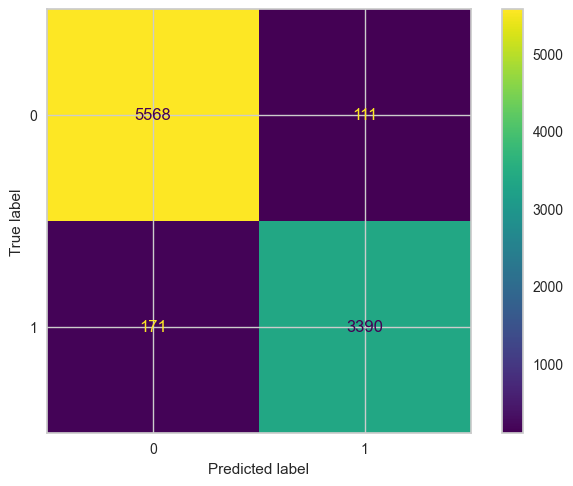

In [29]:
cm = confusion_matrix(predictions['Actual Label'], predictions['Label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Summary of profit calculation

- Each correctly predicted lead would result in \$X towards revenue
- However, a lead that the model predicted as not converted but actually was converted \(FN\)
would be an opportunity cost of \$X (we need to subtract this from revenue)
- It costs \$Y to evaluate/chase a lead
- We will evaluate # of TP's and FP's (if the model predicts the lead as converted but it actually didn't convert thats
a waste of $Y).

Thus, we get an equation of:

$$
\begin{align*}\text{Profit} &= \text{(\# of TP's - \# of FN's)} \cdot \text{benefit gained from converted lead} - \text{(\# of TP's and FP's)} \cdot \text{cost of evaluating lead} \\\ &= (3390 - 171)X - (3390 + 111)Y \end{align*} 
$$

If $X = \$120$ and $Y = \$15$, $\text{Profit} = \$386,280 - \$52,515 = \$333,765$ in our scenario